In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

MIC minimum inhibitory concentration
MBC Minimum bacteriacidal concentration

Cinitial = dose / V

In [2]:
V = 4          # liters
Q = 0.5        # liters/hour
MIC = 5        # mg/liter
MBC = 8        # mg/liter

Cinitial = 16  # mg/liter

V = (dc)/(dt) = u(t) - Q * C

In [3]:
def u(t):
    return 0


def deriv(C,t):
    return u(t)/V - (Q/V)*C

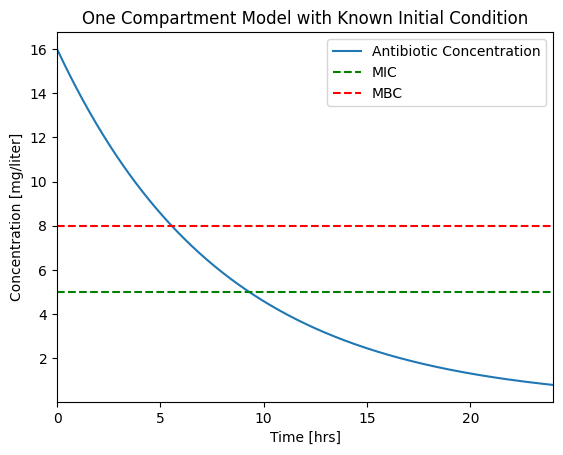

In [4]:
t = np.linspace(0,24,1000)
C = odeint(deriv, Cinitial, t)

def plotConcentration(t,C):
    plt.plot(t,C)
    plt.xlim(0,max(t))
    plt.plot(plt.xlim(),[MIC,MIC],'g--',plt.xlim(),[MBC,MBC],'r--')
    plt.legend(['Antibiotic Concentration','MIC','MBC'])
    plt.xlabel('Time [hrs]')
    plt.ylabel('Concentration [mg/liter]')
    plt.title('One Compartment Model with Known Initial Condition');
    
plotConcentration(t,C)


For the next simulation we will assume the dosing takes place over a short period of time  δt . To obtain a total dose  Udose  in a time period  δt , the mass flow rate rate must be

u(t)={U/δtfor 0≤t≤δt0
     {for t≥δt 

Before doing a simulation, we will write a Python function for  u(t) .

In [5]:
# parameter values
dt = 1.5         # length hours
Udose = 64       # mg

# function defintion
def u(t):
    if t <= dt:
        return Udose/dt
    else:
        return 0

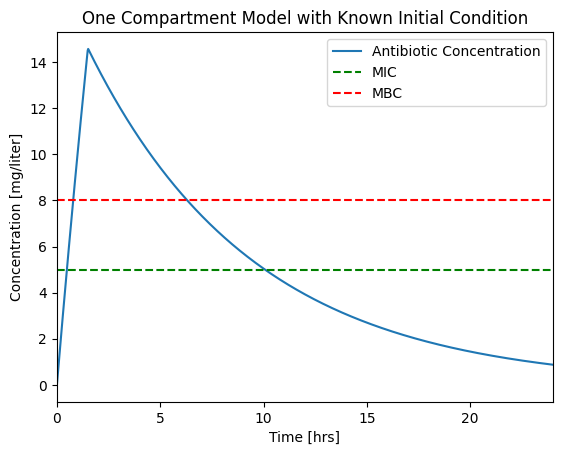

In [6]:
Cinitial = 0
t = np.linspace(0,24,1000)
C = odeint(deriv, Cinitial, t)

plotConcentration(t,C)


Finally, we'll consider the case of repetitive dosing where a new dose is administered every  tdose  hours. The trick to this calculation is the Python % operator which returns the remainder following division. This is a very useful tool for creating complex repetitive functions.

In [7]:
# parameter values
td = 2           # length of administration for a single dose
tdose = 8        # time between doses
Udose = 42       # mg

# function defintion
def u(t):
    if t % tdose < dt:
        return Udose/td
    else:
        return 0

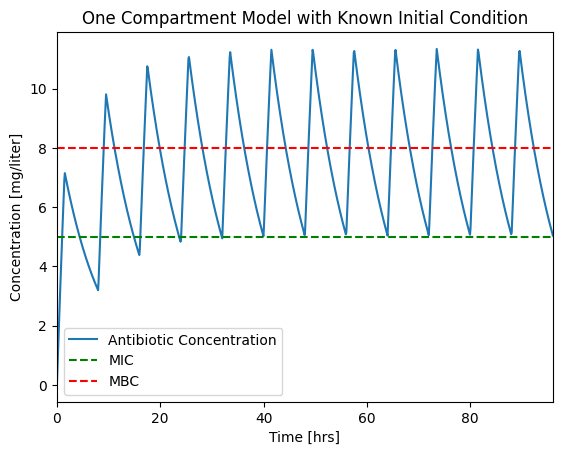

In [8]:
Cinitial = 0
t = np.linspace(0,96,1000)
C = odeint(deriv, Cinitial, t, tcrit=t)
plotConcentration(t,C)